# Generate Masks 

Pre-define 10 masks: 1 + range(4, 16)
Rules:  place 1 sensor on top boundary, on the right boundary, no two sensors are adjacent to each other 


In [1]:

from nopkit.mask import MaskGenerator

n_masks = 5
sensor_range=(4,17)
gen = MaskGenerator(grid_shape=(32, 32))
gen.generate_random(n_masks=n_masks, n_sensors_range=(4, 17), top_position=(31, 16))
gen.save(save_path=f"../data/damage_sensor/masks{n_masks}_range{sensor_range[0]}_{sensor_range[1]}.pt")

c:\workspace\no_playground\neuralop-playground\nopkit_pkg\nopkit\mask.py:93: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  self.masks = torch.tensor(mask_list, dtype=torch.float32)


C:\Users\liuya\AppData\Local\Temp\ipykernel_18872\883019813.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  masks = torch.load("../data/damage_sensor/masks5_range4_17.pt

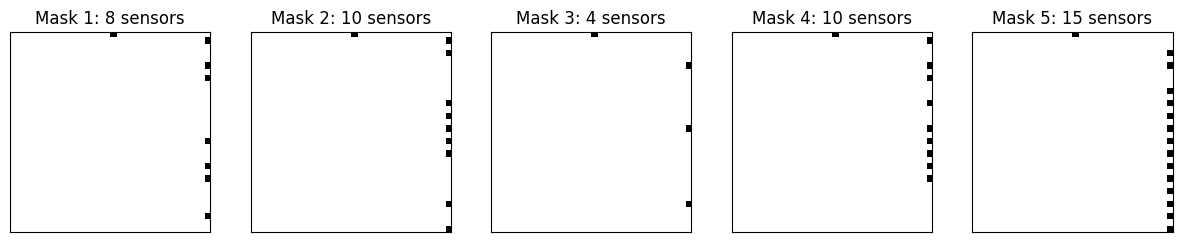

In [2]:
import torch
import matplotlib.pyplot as plt

masks = torch.load("../data/damage_sensor/masks5_range4_17.pt")

fig, axs = plt.subplots(1, 5, figsize=(15, 6))
for i, ax in enumerate(axs.flatten()):
    mask = masks[i]
    n_sensors = int(mask.sum().item())
    ax.imshow(mask, cmap="gray_r", origin="lower")
    ax.set_title(f"Mask {i+1}: {n_sensors} sensors")
    ax.set_xticks([])
    ax.set_yticks([])

In [12]:
from nopkit.mask import MaskGenerator

pos4 = [(31, 16), (0, 31), (10, 31), (20, 31), (30, 31)]
pos6 = [(31, 16), (0, 31), (6, 31), (12, 31), (18, 31), (24, 31), (30, 31)]
pos7 = [(31, 16), (0, 31), (5, 31), (10, 31), (15, 31), (20, 31), (25, 31), (30, 31)]
# pos8 = [(31, 16), (1, 31), (5, 31), (9, 31), (13, 31), (17, 31), (21, 31), (25, 31), (29, 31)]
pos11 = [(31, 16), (0, 31), (3, 31), (6, 31), (9, 31), (12, 31), (15, 31), (18, 31),
         (21, 31), (24, 31), (27, 31), (30, 31)]
pos16 = [
    (31, 16),
    (0, 31), (2, 31), (4, 31), (6, 31), (8, 31), (10, 31), (12, 31), (14, 31),
    (16, 31), (18, 31), (20, 31), (22, 31), (24, 31), (26, 31), (28, 31), (30, 31)
]

pos_list = [pos4, pos6, pos7, pos11, pos16]

# sensor_range=(4,17)
gen = MaskGenerator(grid_shape=(32, 32))

gen.generate_from_positions(positions_list=pos_list)
gen.save(save_path=f"../data/damage_sensor/masks5_uniform.pt")

C:\Users\liuya\AppData\Local\Temp\ipykernel_26860\350823173.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  masks = torch.load("../data/damage_sensor/masks5_uniform.pt")

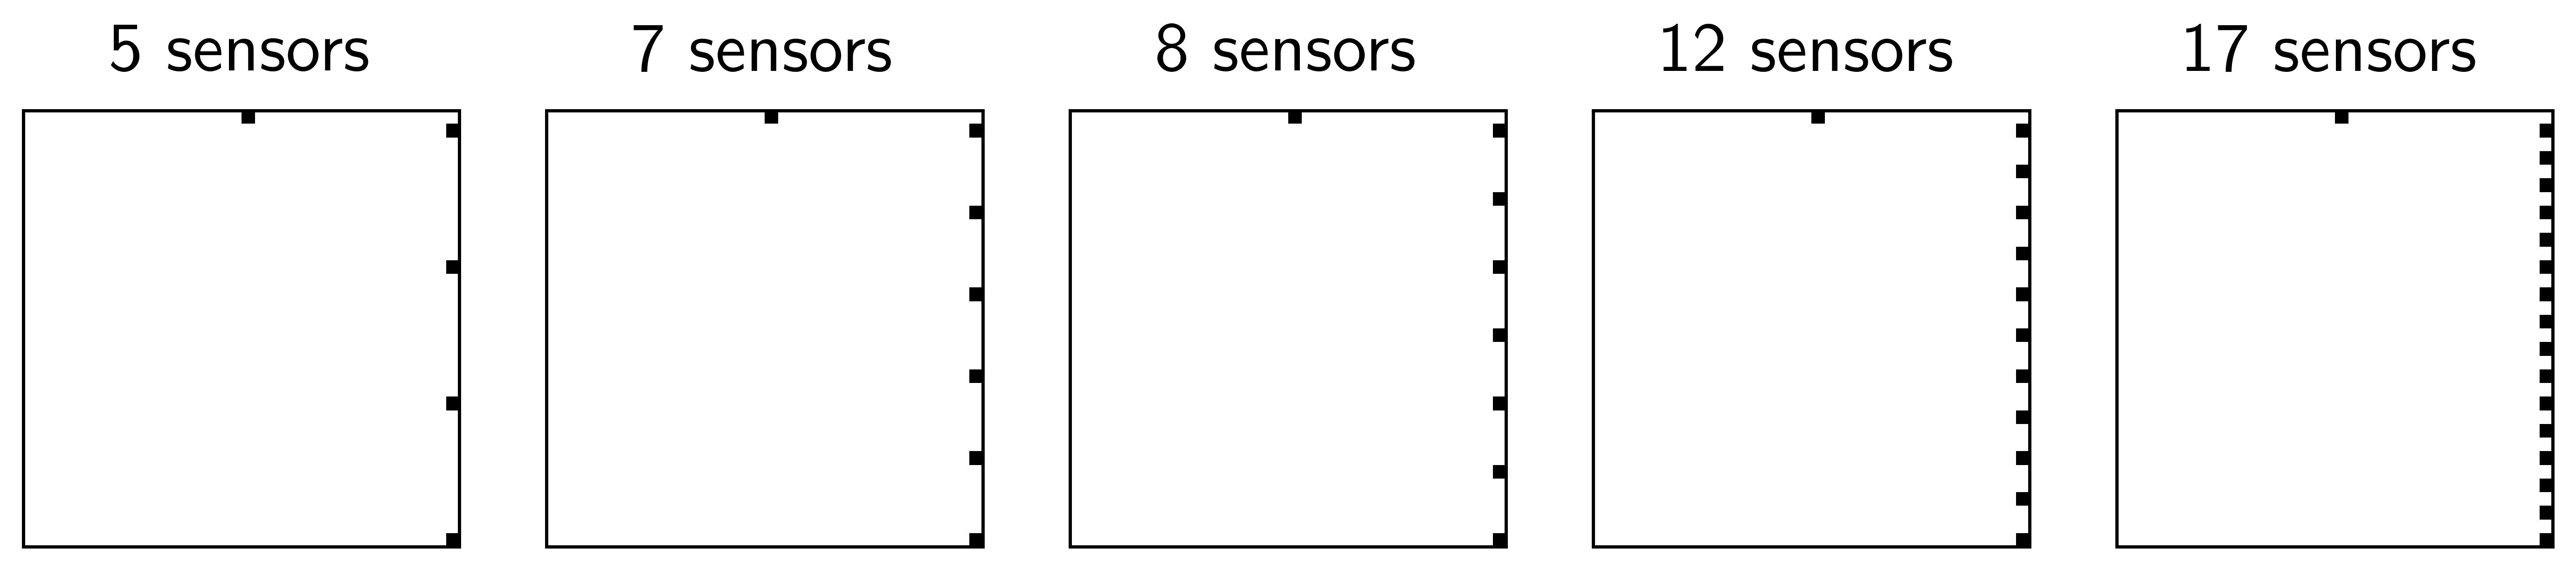

In [17]:
import torch
import matplotlib.pyplot as plt
import cm_vis

masks = torch.load("../data/damage_sensor/masks5_uniform.pt")

plt.style.use("sans")
fig, axs = plt.subplots(1, 5, figsize=(7, 2))
for i, ax in enumerate(axs.flatten()):
    mask = masks[i]
    n_sensors = int(mask.sum().item())
    ax.imshow(mask, cmap="gray_r", origin="lower")
    # ax.set_title(f"Mask {i+1}: {n_sensors} sensors")
    ax.set_title(f"{n_sensors} sensors")
    ax.set_xticks([])
    ax.set_yticks([])